In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
btc = pd.read_html('https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20190903')
btc = btc[0]
dates = btc['Date']
dates = pd.to_datetime(dates)
btc.drop(labels='Date',axis=1,inplace=True)
btc['Date'] = dates
btc = btc.sort_values(by='Date',axis=0,ascending=True)

In [3]:
log_returns = np.log(1 + btc['Close**'].pct_change())

In [4]:
r = .0193

In [5]:
stdev = log_returns.std() * 250 **.5
stdev

0.6844444272490239

In [14]:
stdev = np.array(stdev)

In [16]:
T = 1.0
t_intervals = 365
delta_t = T / t_intervals

iterations = 10000

In [24]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = btc['Close**'].iloc[-1]
S[0] = S0

In [25]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r-.5 * stdev **2) * delta_t + stdev * delta_t **.5 * Z[t])

In [26]:
S

array([[10623.54      , 10623.54      , 10623.54      , ...,
        10623.54      , 10623.54      , 10623.54      ],
       [10406.16489616, 10440.34348556, 10650.32347737, ...,
        11273.71626535, 10744.77538433,  9796.7322392 ],
       [10662.73206902,  9970.25761306, 10067.8538422 , ...,
        11993.52951949, 10995.63612221, 10340.36790806],
       ...,
       [ 4948.30631276,  3800.18154318,  5101.23274712, ...,
         5992.11461546, 15746.7469581 , 16574.04432425],
       [ 4725.22590729,  3771.51904813,  4730.90351501, ...,
         6031.62018174, 15863.26479736, 16686.97868094],
       [ 4565.2210861 ,  3975.91702074,  4612.70225593, ...,
         5876.72514669, 15892.96298128, 16517.68674056]])

In [27]:
S.shape

(366, 10000)

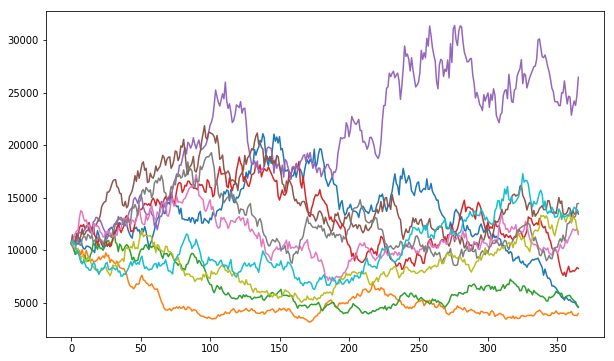

In [28]:
plt.figure(figsize=(10,6))
plt.plot(S[:,:10]);

In [29]:
payoff = np.maximum(S[-1] - 110, 0) 

In [30]:
payoff

array([ 4455.2210861 ,  3865.91702074,  4502.70225593, ...,
        5766.72514669, 15782.96298128, 16407.68674056])

In [32]:
payoff.shape

(10000,)

In [34]:
C = np.exp(-r * T) * np.sum(payoff) / iterations
C

10407.335434167335